# Lab 05

## 1、导入开源数据集
## 2、数据归一化
## 3、测量相似度
## 4、特征挑选
     1）单变量选择
     2）基于树的特征选择
     3）使用相关矩阵

## 此次分享目标：
### （一）使用jupyter notebook进行交互式开发与调试
### （二）利用算法做模型调整与优化（特征值挑选）
### （三）利用工具提高效率

## 1、导入开源数据集 

导入依赖，加载威斯康星州乳腺癌数据集

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


加载数据，将开源数据集读入到dataframe中，并设定目标值

In [3]:
dataset = datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
target = pd.Series(dataset.target)
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

## 2、数据归一化

通常来说，指特征工程中的 特征缩放 过程，由于中文翻译的原因，网上对它们的解释也是五花八门，但其实我们不考虑它们的名字，直接看它们的作用和操作方法，可能会更容易理解。

使用特征缩放的作用是：

使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确。

加快学习算法的收敛速度。


数据归一化 ： 
- MinMaxScaler：将数据归一到 [ 0，1 ] https://blog.csdn.net/weixin_40683253/article/details/81508321#MinMaxScaler%EF%BC%9A%E5%BD%92%E4%B8%80%E5%88%B0%20%5B%200%EF%BC%8C1%20%5D%C2%A0

In [7]:
# 调用MinMaxScaler的方法
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
# data
data_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


- train_test_split()函数是用来随机划分样本数据为训练集和测试集的，当然也可以人为的切片划分。

交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和test data

优点：随机客观的划分数据，减少人为因素

完整模板：

train_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.3,random_state=5)

参数解释：

train_data：待划分样本数据

train_target：待划分样本数据的结果（标签）

test_size：测试数据占样本数据的比例，若整数则样本数量

random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target)
# X_train, X_test, y_train, y_test

## 3、测量相似度


Russel-Rao similarity

拉塞尔·劳的相似性。在这里提供的空间中，实现计算Russel Rao的函数

https://zhuanlan.zhihu.com/p/101277851

两个实例之间的相似性。
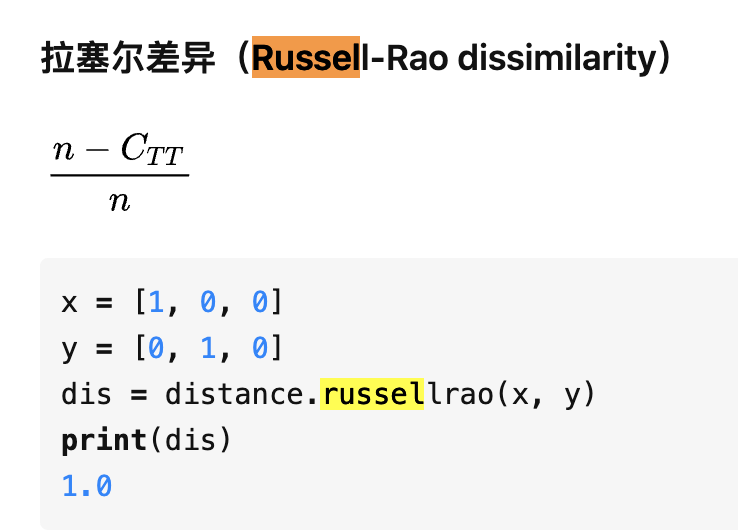

In [9]:
# scipy中的距离计算模块，scipy.spatial.distance
from scipy.spatial import distance
def russel_rao(ins1, ins2):
    '''
    Russel-Rao similarity
    :param ins1: list - containing the features for instance 1
    :param ins2: list - containing the features for instance 2
    :return: float - russel_rao similarity index
    '''
    # TODO: implement it here.
    dis = 1-distance.russellrao(ins1, ins2)
    print(dis)
    return


 现在是时候检查您的函数是否正常工作了。我们可以使用单元测试。下面是一个
这样的考验。

In [10]:
ins_1 = [1, 1, 1, 0, 1]
ins_2 = [1, 0, 1, 0, 0]
rus_rao_similarity = russel_rao(ins_1, ins_2)
rus_rao_similarity
# assert rus_rao_similarity == 0.4, 'Test failed.'

0.4


如果条件失败，Assert函数将引发AssertionError。再加两个测试。

- pandas.DataFrame.sample 随机选取若干行

In [12]:
ins_1 = data_scaled.sample(n=1)
ins_2 = data_scaled.sample(n=1)

Russel-Rao method

罗素用上面的方法开发了相似的实例。

In [13]:
ins_1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
466,0.291495,0.373013,0.291549,0.166872,0.308026,0.274584,0.254217,0.174453,0.253535,0.21567,...,0.244397,0.358209,0.251457,0.123845,0.422175,0.317849,0.359744,0.405842,0.196728,0.175128


In [14]:
ins_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
118,0.416442,0.446398,0.427821,0.271092,0.567572,0.477946,0.499766,0.471123,0.523232,0.491786,...,0.436144,0.492537,0.397878,0.267106,0.755002,0.451349,0.58754,0.698969,0.336882,0.460186


In [15]:
rus_rao_similarity = russel_rao(ins_1, ins_2)
rus_rao_similarity

0.09949837696283437


## 4、特征挑选

 在课堂上我们讨论了特征选择的重要性。它是机器学习的重要组成部分
对模型的性能有很大的影响。在实践中，我们使用三种主要方法来选择最佳特性。
 
 
 * Univariate selection
 * Tree-based feature selection
 * Using a correlation matrix
 
- 单变量选择
- 基于树的特征选择
- 使用相关矩阵
  
 
 这些只是识别好特征的一般方法。另外，根据你使用的方法，你可以得到不同的结果
功能集是最好的。

### 1）单变量选择


You can see the documentation of SelectKBest function [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

单变量特征选择通过 '基于单变量统计检验' 选择 最佳特征 来工作。sklearn.feature_selection 具有SelectKBest函数，该函数使用单变量选择从特征集（>K）中选择佳K个特征

可以查看SelectKBest函数的文档
让我们看看使用卡方统计检验，我们最好的10个特性是什么。

#### SelectKBest()
##### 参数
1、score_func : callable，函数取两个数组X和y，返回一对数组（scores, pvalues）或一个分数的数组。默认函数为f_classif，默认函数只适用于分类函数。

2、k：int or "all", optional, default=10。所选择的topK个特征。“all”选项则绕过选择，用于参数搜索。

##### 属性
1、scores_ : array-like, shape=(n_features,)，特征的得分

2、pvalues_ : array-like, shape=(n_features,)，特征得分的p_value值，如果score_func只返回分数，则返回None。

##### 方法
1、fit(X,y)，在（X，y）上运行记分函数并得到适当的特征。

2、fit_transform(X[, y])，拟合数据，然后转换数据。

3、get_params([deep])，获得此估计器的参数。

4、get_support([indices])，获取所选特征的掩码或整数索引。

5、inverse_transform(X)，反向变换操作。

6、set_params(params)，设置估计器的参数。

7、transform(X)，将X还原为所选特征。


In [16]:
# 使用卡方检验选择topK的特征
best_features = SelectKBest(score_func=chi2, k=10).fit(data, target)
print("best_features:")
print(best_features)
print('\n')

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

# concat two dataframes for better visualization 
# 合并两个数据集以获得更好的可视化效果
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns 命名数据集列

print(featureScores.nlargest(10,'Score'))

best_features:
SelectKBest(score_func=<function chi2 at 0x12ed7d200>)


              Specs          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508


nlargest()的优点就是能一次看到最大的几行，而且不需要排序。缺点就是只能看到最大的，看不到最小的。

我们来看看单价排在前十的数据：

- nlargest()
 
 第一个参数是 截取的行数。
 
 第二个参数是 依据的列名。

这样就可以筛选出评分最高的前十行，而且是按照评分从最高到最低进行排列的，所以还是按照之前的索引。

### 2）基于树的特征选择

基于树的估计器（参见sklearn.tree模块和随机森林sklearn.ensemble模块）

通过随机森林进行分类，可用于计算各个特征重要性，这反过来又可以用来丢弃不相关的特征。

特征重要性为数据的每个特征打分，得分越高越重要或相关输出变量的特性。

我们将使用额外的树分类器来提取数据集的前10个特征。

---


from sklearn.ensemble import ExtraTreesClassifier
sklearn中集成学习（Ensemble methods）部分

https://blog.csdn.net/good_boyzq/article/details/54730004

- ExtraTreesClassifier()

极端随机树（ExtremelyRandomized Trees）

▲在极端随机树中，在拆分节点的过程中随机性会更进一步的进行考虑。

在极端随机树中，训练集为属性的随机组合，在节点分割时，并不是寻找最佳分割阈值，而是随机的抽取。

通常该模型会更进一步的减少方差，但是其偏差会相对于增加。


worst perimeter         0.129466
worst area              0.105272
mean concave points     0.088570
worst radius            0.075156
worst concave points    0.074338
mean radius             0.067394
worst concavity         0.054341
mean area               0.046558
mean concavity          0.040608
mean perimeter          0.040203
dtype: float64

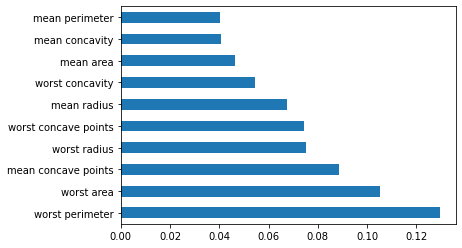

In [17]:
tree = ExtraTreesClassifier()
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
df_feature_importances.nlargest(10).plot(kind='barh')
df_feature_importances.nlargest(10)

### 3）相关矩阵


相关性说明特征如何相互关联或与目标变量相关。

它可以是正的，也可以是没有。所以接近1和-1的值非常好，两边接近0的值也不好。

我们将使用热图来容易地识别相关性。

plt.subplots(figsize=(9, 9))设置画面大小，会使得整个画面等比例放大的

sns.heapmap()这个当然是用来生成热力图的啦

df是DataFrame， pandas的这个类还是很常用的啦~

df.corr()就是得到这个dataframe的相关系数矩阵

把这个矩阵直接丢给sns.heapmap中做参数就好啦

sns.heapmap中annot=True，意思是显式热力图上的数值大小。

sns.heapmap中square=True，意思是将图变成一个正方形，默认是一个矩形

sns.heapmap中cmap="Blues"是一种模式，就是图颜色配置方案啦，我很喜欢这一款的。

sns.heapmap中vmax是显示最大值

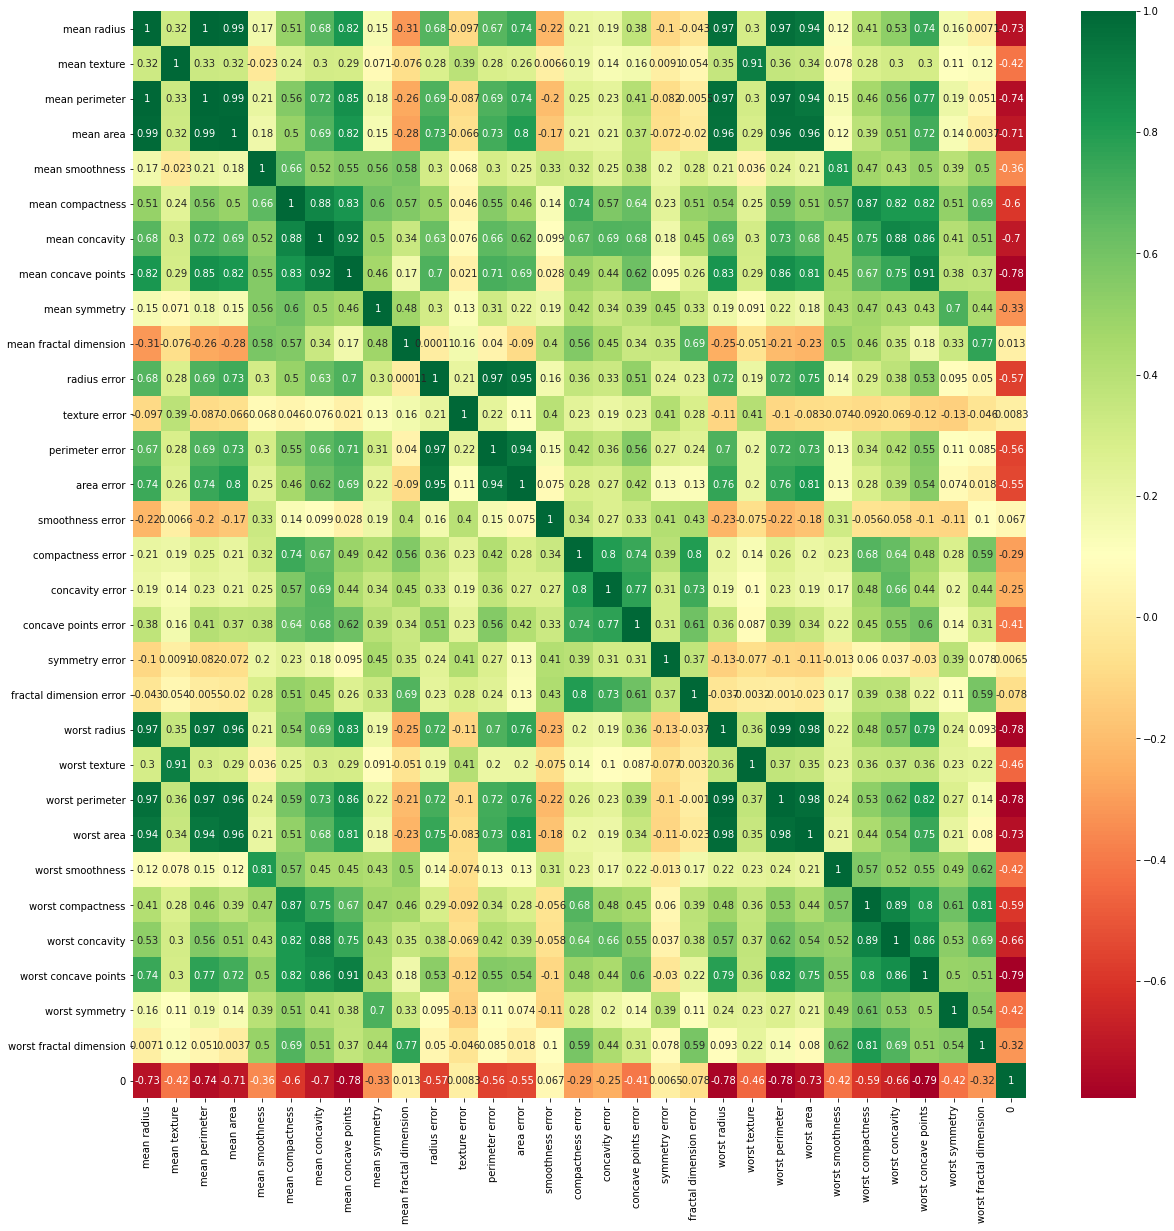

In [15]:
combine = pd.concat([data, target], axis=1)
corr_mat = combine.corr()


plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

观察最后一个raw和column，可以看到几乎所有的好特征都是与目标特征反向相关。

# Task
* Import your cleaned dataset from week 3 here.
* Train a KNN model for the data using all the features and measure its performance.
* Use one of the feature selection methods and identify a set of features that are better compared to others.
* Train another KNN model only using those selected features and measure the performace.
* Compare results of the models.

# 任务
- 在这里导入第3周清理后的数据集。
- 使用所有特征训练一个KNN模型，并测量其性能。
- 使用一种特征选择方法，识别出一组比其他方法更好的特征。
- 训练另一个KNN模型只使用这些选择的特征和衡量性能。
- 比较模型的结果。